Data Mining Loan prediction model by Ayelene Biju and Juan José Mayorga

In [ ]:
import pandas as pd
from sklearn.metrics import confusion_matrix
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Load Dataset

In [ ]:
file_path = "/content/drive/MyDrive/case_study/Data_Mining/UniversalBank.csv"
data = pd.read_csv(file_path)
display(data)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
print(data.info())
print(data.isnull().sum())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB
None
ID                    0
Age                   0
Exp

Compute correlation matrix

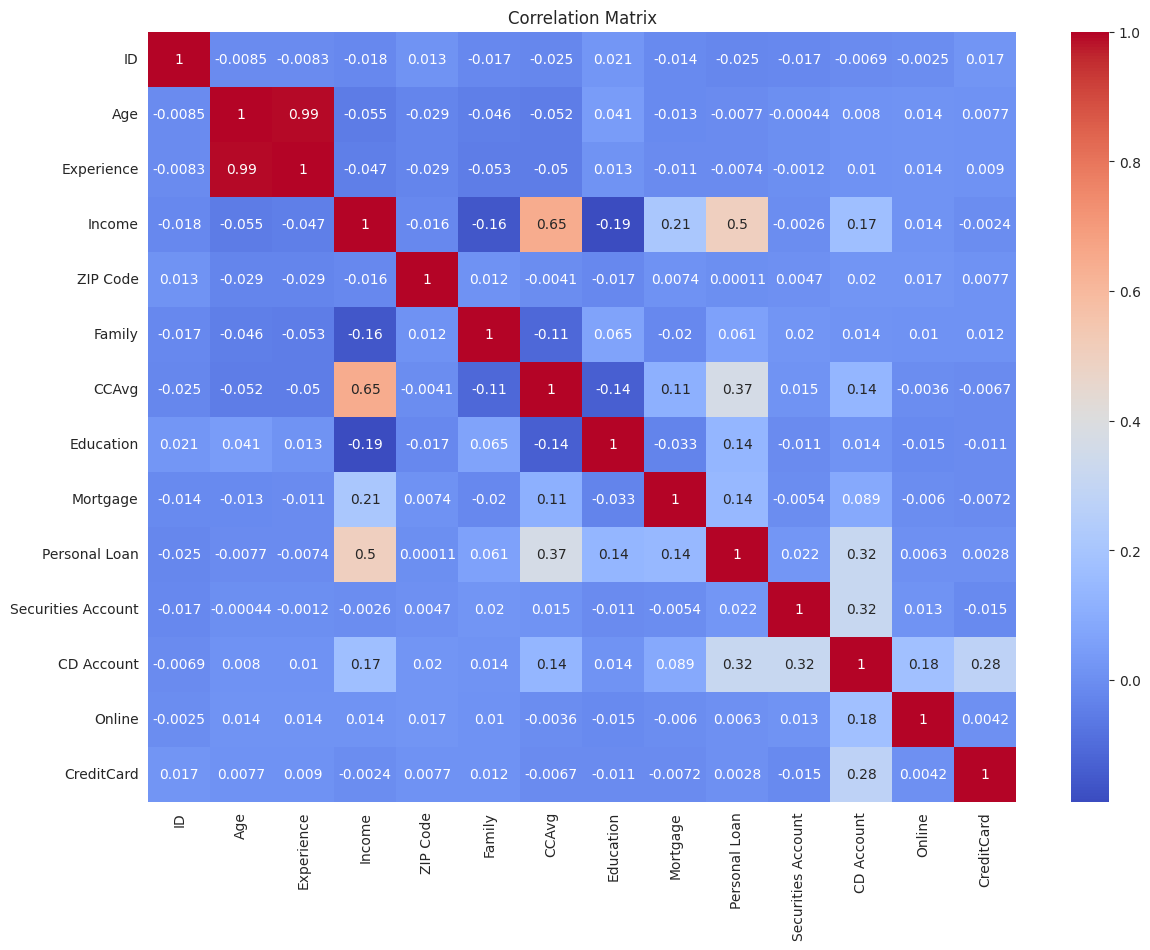

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

plt.figure(figsize=(14,10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')

plt.show()


Drop least correlated colums

In [ ]:
data.drop(columns=['ID','Age','Experience','ZIP Code','Online','CreditCard'])

,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account
0,49,4,1.6,1,0,0,1,0
1,34,3,1.5,1,0,0,1,0
2,11,1,1.0,1,0,0,0,0
3,100,1,2.7,2,0,0,0,0
4,45,4,1.0,2,0,0,0,0
...,...,...,...,...,...,...,...,...
4995,40,1,1.9,3,0,0,0,0
4996,15,4,0.4,1,85,0,0,0
4997,24,2,0.3,3,0,0,0,0
4998,49,3,0.5,2,0,0,0,0


Get more insights

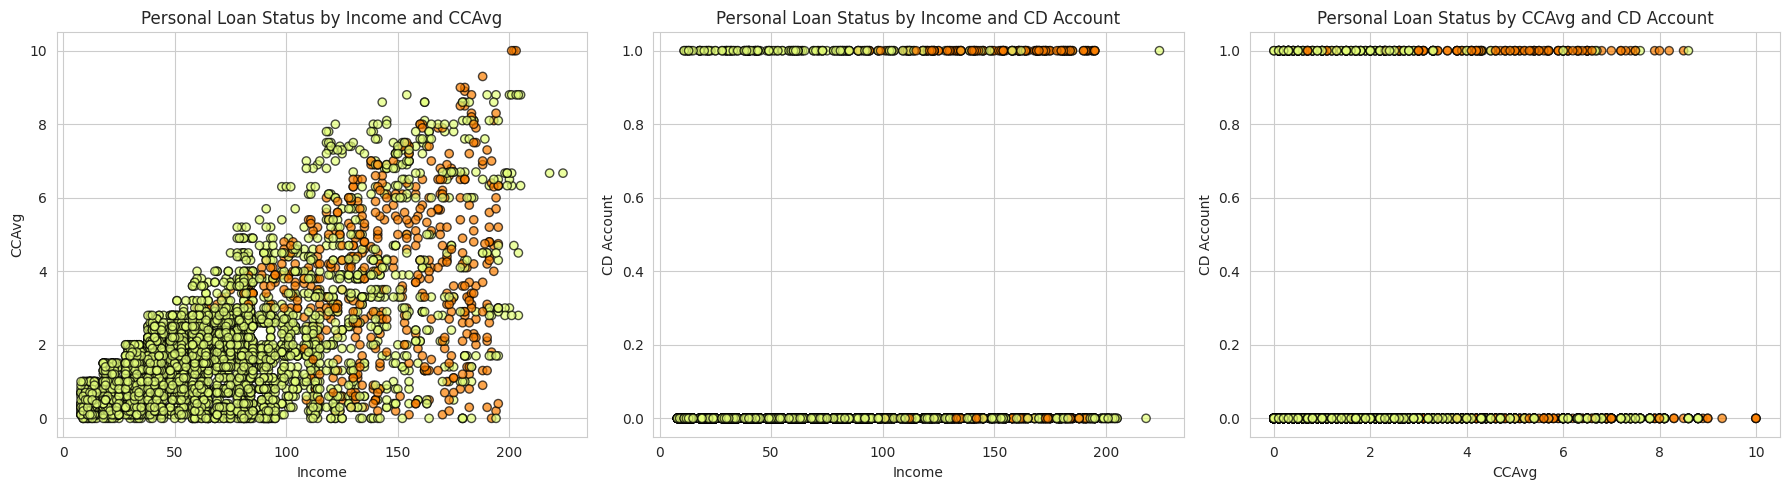

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

sc1 = ax[0].scatter(data['Income'], data['CCAvg'], c=data['Personal Loan'], cmap='Wistia', edgecolor='k', alpha=0.7)
ax[0].set_title('Personal Loan Status by Income and CCAvg')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('CCAvg')

sc2 = ax[1].scatter(data['Income'], data['CD Account'], c=data['Personal Loan'], cmap='Wistia', edgecolor='k', alpha=0.7)
ax[1].set_title('Personal Loan Status by Income and CD Account')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('CD Account')


sc3 = ax[2].scatter(data['CCAvg'], data['CD Account'], c=data['Personal Loan'], cmap='Wistia', edgecolor='k', alpha=0.7)
ax[2].set_title('Personal Loan Status by CCAvg and CD Account')
ax[2].set_xlabel('CCAvg')
ax[2].set_ylabel('CD Account')


plt.tight_layout()
plt.show()

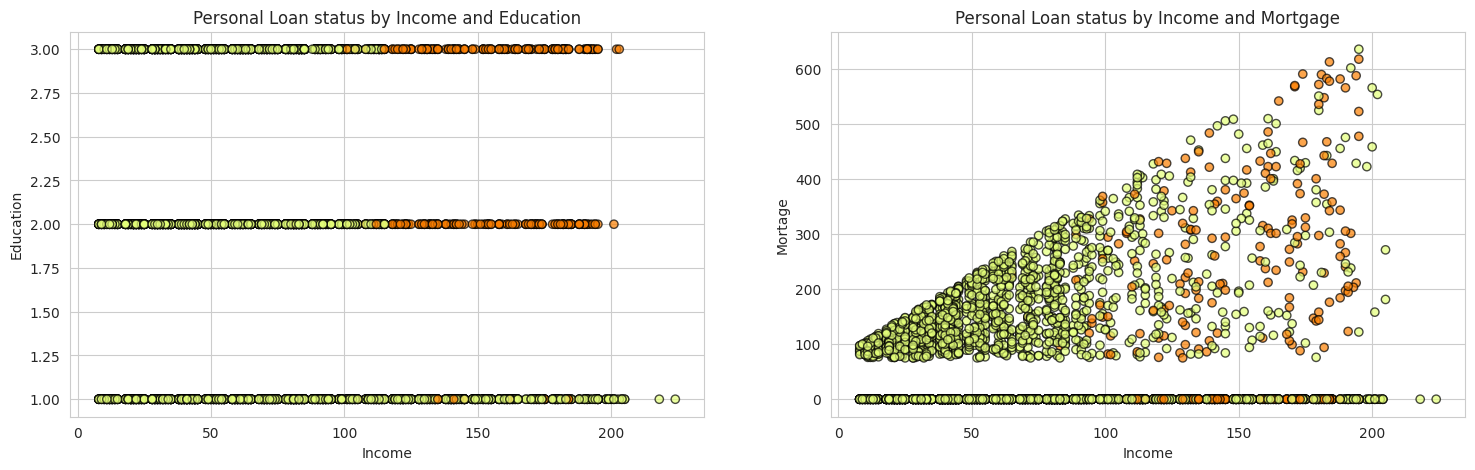

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(18, 5))

s1 = ax[0].scatter(data['Income'], data['Education'], c=data['Personal Loan'], cmap='Wistia', edgecolor='k', alpha=0.7)
ax[0].set_title('Personal Loan status by Income and Education')
ax[0].set_xlabel('Income')
ax[0].set_ylabel('Education')

s2= ax[1].scatter(data['Income'],data['Mortgage'], c=data['Personal Loan'], cmap='Wistia', edgecolor='k', alpha=0.7)
ax[1].set_title('Personal Loan status by Income and Mortgage')
ax[1].set_xlabel('Income')
ax[1].set_ylabel('Mortage')


plt.show()


Clustering

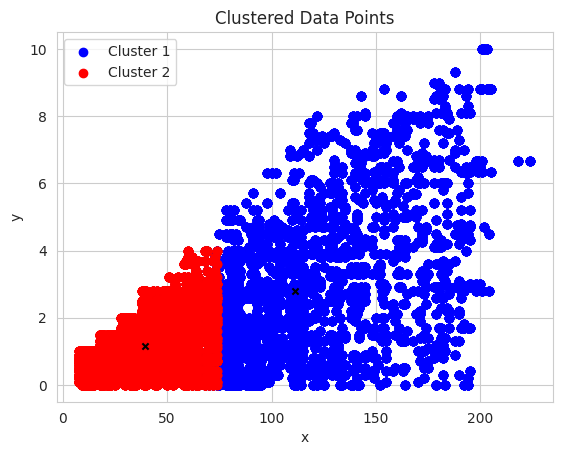

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


x, y = data['Income'], data['CCAvg']


x1, y1 = [], []
x2, y2 = [], []


x1_mean = x[0]
y1_mean = y[0]
x2_mean = x[1]
y2_mean = y[1]


def distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2)**2 + (y1 - y2)**2)


for i in range(10):
    for i in range(len(x)):
        d1 = distance(x[i], y[i], x1_mean, y1_mean)
        d2 = distance(x[i], y[i], x2_mean, y2_mean)
        if d1 < d2:
            x1.append(x[i])
            y1.append(y[i])
        else:
            x2.append(x[i])
            y2.append(y[i])
    x1_mean, y1_mean = np.mean(x1), np.mean(y1)
    x2_mean, y2_mean = np.mean(x2), np.mean(y2)


plt.figure(0)
plt.scatter(x1, y1, color='blue', label='Cluster 1')
plt.scatter(x2, y2, color='red', label='Cluster 2')
plt.scatter(x1_mean, y1_mean, s=20, marker='x', c='black')
plt.scatter(x2_mean, y2_mean, s=20, marker='x', c='black')
plt.title('Clustered Data Points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Build Neural Network model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np


numerical_cols = ['Income', 'Family', 'CCAvg', 'Mortgage']
categorical_cols = ['Education', 'Securities Account', 'CD Account']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(), categorical_cols)
    ])

X = data.drop('Personal Loan', axis=1)
y = data['Personal Loan'].values


X_processed = preprocessor.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.10, random_state=42)


X_train_torch = torch.tensor(X_train.astype(np.float32))
X_test_torch = torch.tensor(X_test.astype(np.float32))
y_train_torch = torch.tensor(y_train.astype(np.float32))
y_test_torch = torch.tensor(y_test.astype(np.float32))


train_data = TensorDataset(X_train_torch, y_train_torch)
test_data = TensorDataset(X_test_torch, y_test_torch)

batch_size = 64
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)


class LoanPredictionNN(nn.Module):
    def __init__(self):
        super(LoanPredictionNN, self).__init__()
        self.fc1 = nn.Linear(X_train.shape[1], 50)
        self.fc2 = nn.Linear(50, 20)
        self.fc3 = nn.Linear(20, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        return self.sigmoid(self.fc3(x))

Train and test the model

In [ ]:
def train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs):
    model.train()
    train_loss_history = []
    test_loss_history = []

    for epoch in range(num_epochs):

        model.train()
        total_train_loss = 0
        for data, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(data)
            loss = criterion(outputs.squeeze(), targets)
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        average_train_loss = total_train_loss / len(train_loader)
        train_loss_history.append(average_train_loss)


        model.eval()
        total_test_loss = 0
        with torch.no_grad():
            for data, targets in test_loader:
                outputs = model(data)
                loss = criterion(outputs.squeeze(), targets)
                total_test_loss += loss.item()
        average_test_loss = total_test_loss / len(test_loader)
        test_loss_history.append(average_test_loss)


        print(f'Epoch {epoch+1}/{num_epochs}, Training Loss: {average_train_loss:.4f}, Test Loss: {average_test_loss:.4f}')

    return train_loss_history, test_loss_history

model = LoanPredictionNN()
optimizer = torch.optim.Adam(model.parameters())
criterion = torch.nn.BCELoss()
train_loss, test_loss = train_model(model, train_loader, test_loader, criterion, optimizer, num_epochs=50)

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test set: {accuracy:.2f}%')

Epoch 1/50, Training Loss: 0.4983, Test Loss: 0.2700
Epoch 2/50, Training Loss: 0.2023, Test Loss: 0.1783
Epoch 3/50, Training Loss: 0.1514, Test Loss: 0.1277
Epoch 4/50, Training Loss: 0.1190, Test Loss: 0.0899
Epoch 5/50, Training Loss: 0.0967, Test Loss: 0.0684
Epoch 6/50, Training Loss: 0.0845, Test Loss: 0.0572
Epoch 7/50, Training Loss: 0.0762, Test Loss: 0.0526
Epoch 8/50, Training Loss: 0.0709, Test Loss: 0.0488
Epoch 9/50, Training Loss: 0.0664, Test Loss: 0.0463
Epoch 10/50, Training Loss: 0.0647, Test Loss: 0.0454
Epoch 11/50, Training Loss: 0.0623, Test Loss: 0.0438
Epoch 12/50, Training Loss: 0.0604, Test Loss: 0.0434
Epoch 13/50, Training Loss: 0.0615, Test Loss: 0.0433
Epoch 14/50, Training Loss: 0.0577, Test Loss: 0.0429
Epoch 15/50, Training Loss: 0.0568, Test Loss: 0.0429
Epoch 16/50, Training Loss: 0.0557, Test Loss: 0.0420
Epoch 17/50, Training Loss: 0.0547, Test Loss: 0.0417
Epoch 18/50, Training Loss: 0.0548, Test Loss: 0.0418
Epoch 19/50, Training Loss: 0.0533, T

Loss function plot

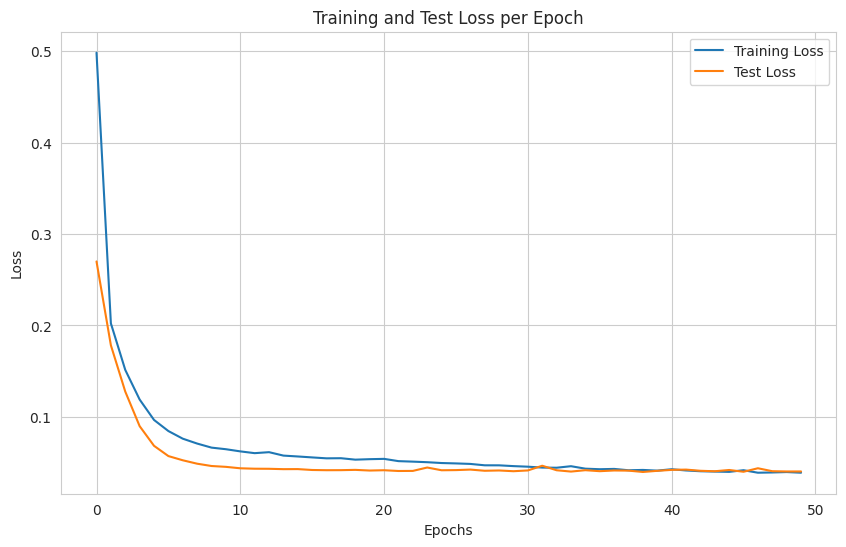

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Training and Test Loss per Epoch')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model evaluation: Confusion Matrix

In [ ]:
model.eval()
y_pred = []
y_true = []

with torch.no_grad():
  for data, targets in test_loader:
      outputs = model(data)
      predicted = (outputs.squeeze() > 0.5).numpy()
      y_pred.extend(predicted)
      y_true.extend(targets.numpy())


conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[445   1]
 [  4  50]]


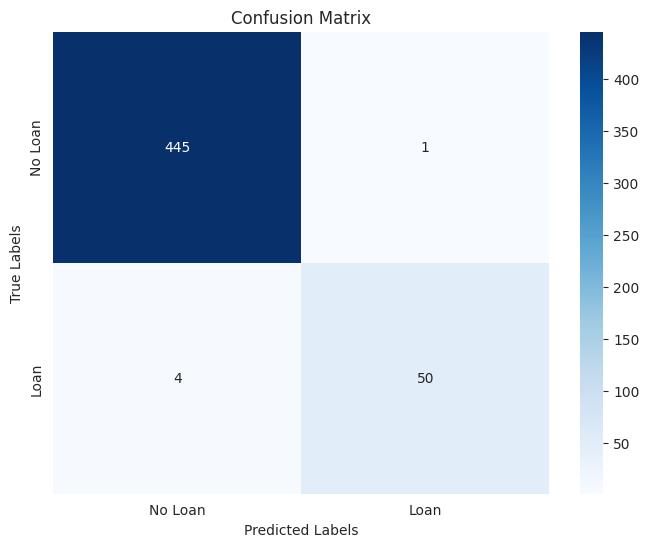

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Loan', 'Loan'], yticklabels=['No Loan', 'Loan'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

Model evaluation: Compute precision

In [ ]:
def calculate_precision(conf_matrix):

    TP = conf_matrix[1, 1]
    FP = conf_matrix[0, 1]


    precision = TP / (TP + FP) *100 if (TP + FP) > 0 else 0
    return precision


precision = calculate_precision(conf_matrix)
print("Precision:", precision,"%")

Precision: 98.0392156862745 %


Model evaluation: ROC Curve

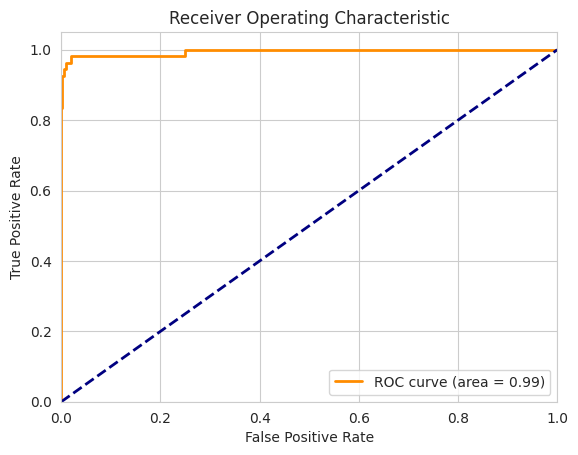

In [ ]:
from sklearn.metrics import roc_curve, auc
with torch.no_grad():
    y_true = []
    y_scores = []

    for data, targets in test_loader:
        outputs = model(data)
        probabilities = torch.sigmoid(outputs.squeeze())
        y_scores.extend(probabilities.numpy())
        y_true.extend(targets.numpy())

from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()